## 4 digits - Merging only year wise

### Waves 4,5,6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/work_quality_indexes_year.csv"
)

In [3]:
df = df.merge(indexes, on=["year", "isco"], how="inner")

In [4]:
df

,mergeid,wave,year,age,nb_children,partnerinhh,job_status,eurod,eurodcat,country,...,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted,jqi_sum,jqi_sum_weighted
0,AT-009262-01,4,2011,56.0,1.0,1,Self-employed,1.0,0,Austria,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,418.133189,226.690947
1,AT-329641-01,4,2011,55.0,2.0,0,Employee,0.0,0,Austria,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,418.133189,226.690947
2,Bf-339845-02,4,2011,50.0,2.0,1,Employee,1.0,0,Belgium,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,418.133189,226.690947
3,Cg-816797-01,4,2011,55.0,2.0,1,Employee,3.0,0,Switzerland,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,418.133189,226.690947
4,Cg-826059-01,4,2011,53.0,1.0,0,Employee,1.0,0,Switzerland,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,418.133189,226.690947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12416,IT-441831-01,6,2015,56.0,3.0,1,Private sector employee,0.0,0,Italy,...,80.468750,1129.806589,41.504018,95.223384,83.853885,23.652318,59.970552,86.058510,282.384633,151.157472
12417,IT-444601-01,6,2015,58.0,3.0,1,Private sector employee,5.0,1,Italy,...,80.925000,2383.498774,56.218396,71.424954,62.565819,27.048906,49.515750,65.543946,428.139680,314.430970
12418,IT-596184-03,6,2015,56.0,1.0,1,Private sector employee,3.0,0,Italy,...,89.916667,1111.669964,36.688529,89.571073,72.964777,45.205521,49.758367,91.010655,390.172197,127.266991
12419,IT-713545-04,6,2015,56.0,2.0,1,Public sector employee,4.0,1,Italy,...,70.750000,3656.267886,96.116830,154.425868,132.960457,91.483623,134.106675,126.507297,423.782010,757.759950


In [5]:
df.mergeid.nunique()

6585

In [6]:
df.groupby("country").mergeid.nunique()

country
Austria           389
Belgium           807
Czech Republic    522
Denmark           512
Estonia           783
France            439
Germany           812
Italy             624
Slovenia          374
Spain             758
Switzerland       565
Name: mergeid, dtype: int64

In [7]:
df.groupby("year").mergeid.nunique()

year
2011    3559
2013    4635
2015    4227
Name: mergeid, dtype: int64

In [8]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w456_year.csv",
    index=False,
)

### Some descriptive stats

In [9]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,12421.00,12421.00,12421.00,12421.00
mean,56.41,0.53,1.77,12.61
std,3.14,0.50,1.27,4.58
min,50.00,0.00,0.00,0.00
25%,54.00,0.00,1.00,10.00
50%,56.00,1.00,2.00,13.00
75%,59.00,1.00,2.00,16.00
max,65.00,1.00,11.00,39.00


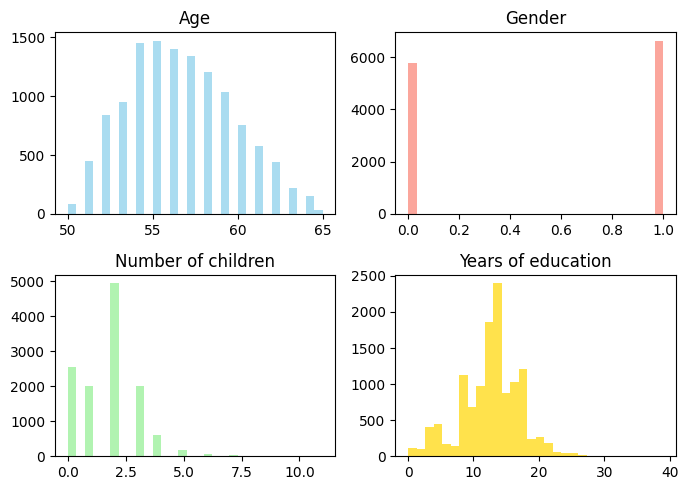

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [11]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.39
Public sector employee     0.23
Employee                   0.21
Self-employed              0.13
Civil servant              0.04
Name: proportion, dtype: float64

In [12]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,12421.00,12421.00,12421.00,12421.00
mean,35.89,63.12,6.71,0.26
std,6.13,2.11,3.40,0.60
min,6.00,57.00,0.08,0.00
25%,33.00,62.00,4.00,0.00
50%,36.00,63.00,7.00,0.00
75%,40.00,65.00,9.00,0.08
max,55.00,68.00,17.00,4.00


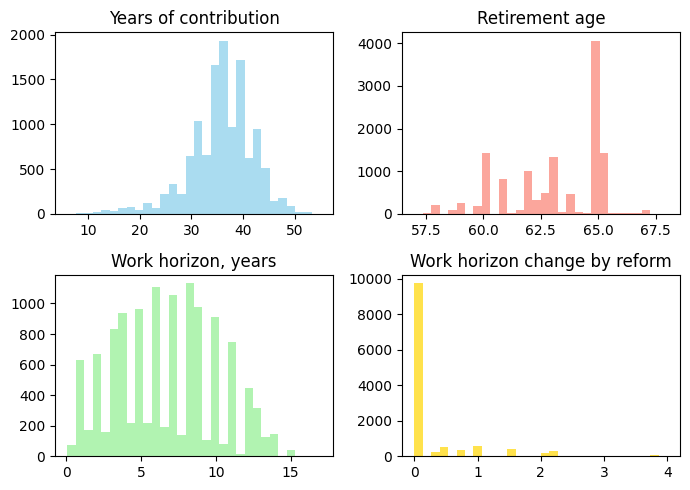

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [14]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.81
1    0.19
Name: proportion, dtype: float64

In [15]:
df["eurod"].value_counts()

eurod
0.0     3295
1.0     3035
2.0     2237
3.0     1546
4.0     1054
5.0      618
6.0      330
7.0      173
8.0       70
9.0       46
10.0      12
11.0       4
12.0       1
Name: count, dtype: int64

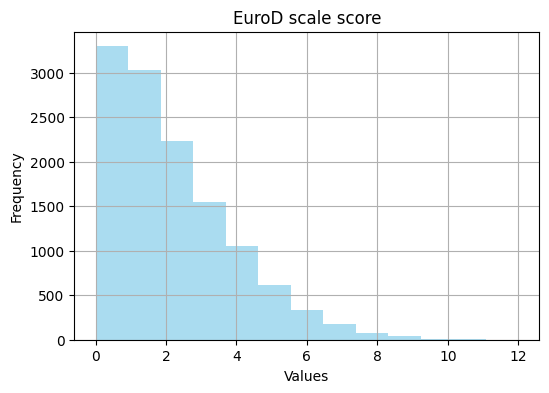

In [16]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [17]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,12421.00,12421.00,12421.00,12421.00,12421.00,12421.00,12421.00
mean,1572.72,58.51,80.47,84.50,50.87,59.84,86.43
std,464.53,13.66,3.75,8.31,6.29,8.52,9.36
min,419.13,5.41,40.91,42.82,20.16,12.50,39.96
25%,1270.35,47.74,78.71,78.15,46.84,54.33,81.65
50%,1502.92,57.82,80.66,87.26,50.39,60.42,88.77
75%,1789.99,70.31,82.61,91.58,54.59,65.53,93.26
max,6766.63,89.61,100.00,98.90,76.74,87.50,100.00


### Waves 4,5,6 common individuals

In [18]:
df.mergeid.nunique()

6585

In [19]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

1662

In [20]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [21]:
w456_common.groupby("country").mergeid.nunique()

country
Austria           126
Belgium           228
Czech Republic    125
Denmark           152
Estonia           274
France            153
Germany            23
Italy             110
Slovenia           74
Spain             106
Switzerland       291
Name: mergeid, dtype: int64

In [22]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [23]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w456_year_common.csv",
    index=False,
)

### Waves 4 and 6

In [24]:
result = (
    df[df["year"].isin([2013, 2015])]
    .groupby("mergeid")["work_horizon_change"]
    .sum()
    .reset_index()
)
result["year"] = 2015

df = df.drop(columns="work_horizon_change")
df = df.merge(result, on=["mergeid", "year"], how="left")

df["work_horizon_change"] = df["work_horizon_change"].fillna(0)

In [25]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [26]:
w46.mergeid.nunique()

5866

In [27]:
w46.groupby("country").mergeid.nunique()

country
Austria           372
Belgium           727
Czech Republic    455
Denmark           459
Estonia           742
France            422
Germany           642
Italy             544
Slovenia          347
Spain             600
Switzerland       556
Name: mergeid, dtype: int64

In [28]:
w46.groupby("wave").mergeid.nunique()

wave
4    3559
6    4227
Name: mergeid, dtype: int64

In [29]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [30]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

1920

In [31]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [32]:
w46_common.groupby("country").mergeid.nunique()

country
Austria           148
Belgium           270
Czech Republic    153
Denmark           162
Estonia           312
France            175
Germany            26
Italy             137
Slovenia           92
Spain             124
Switzerland       321
Name: mergeid, dtype: int64

In [33]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [34]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year_common.csv",
    index=False,
)